In [23]:
from nfce_db import get_engine_bd
import pandas as pd
import matplotlib.pyplot as plt
engine = get_engine_bd()
QT_GRAFICOS = 5

In [3]:
df_saida = pd.read_sql_table('saida_produtos_v',con=engine)
df_saida.head()
#df_plot(ax=df_plot.qt_saida)

,id_saida_produtos,dt_criacao,dt_saida,qt_saida,ds_produto,cd_ean_saida,id_produto,id_classe_produto,ds_classe_produto,id_agrupamento,ds_agrupamento
0,426,2020-08-22 13:19:45,2020-08-22,1,Polpa de Fruta Tangerina Canaã 100G,7898130777137,100,33,Polpas de Fruta,12,Hortifruti
1,425,2020-08-22 13:19:19,2020-08-22,1,Polpa de Fruta Cajá Brasfrut 100g,7896014400461,255,33,Polpas de Fruta,12,Hortifruti
2,427,2020-08-22 15:50:24,2020-08-21,1,Manteiga com Sal Aviação Pote 500G,7896331100327,16,6,Manteiga,8,Lacticionios/Frios
3,424,2020-08-21 21:59:39,2020-08-21,4,Cerveja Skol Lata 473ML,7891149201006,231,39,Cervejas,7,Bebidas
4,423,2020-08-21 21:59:17,2020-08-21,1,Amedoim Poligrãos 500G,7896752400877,52,17,Amendoin,4,Grão/Cereais


In [4]:
df_evolucao = pd.crosstab(df_saida.dt_saida,
                          df_saida.ds_classe_produto,
                          values=df_saida.qt_saida,
                          aggfunc='sum').copy()
df_evolucao

ds_classe_produto,A Classificar,Amaciantes,Amendoin,Arroz,Aveia,Açucar,Biscoitos,Café,Carne Bovina,Carne Suína,...,Pipoca,Polpas de Fruta,Pão,Queijo,Refrigerante,Sabão,Sulcos de Fruta,Água Mineral,Água Sanitária,Óleos Coméstiveis
dt_saida,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2020-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2020-04-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN
2020-04-27,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-18,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


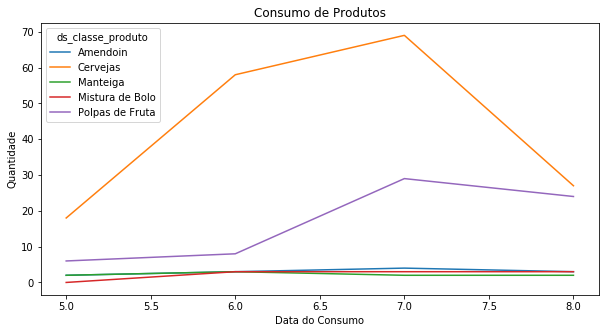

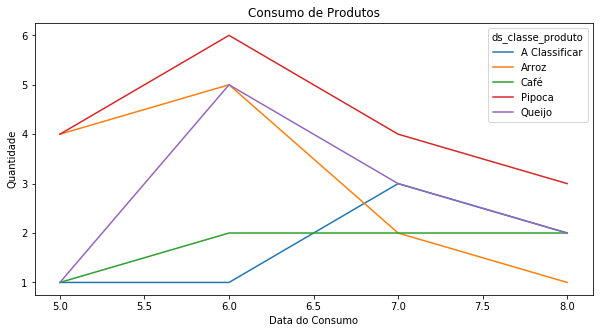

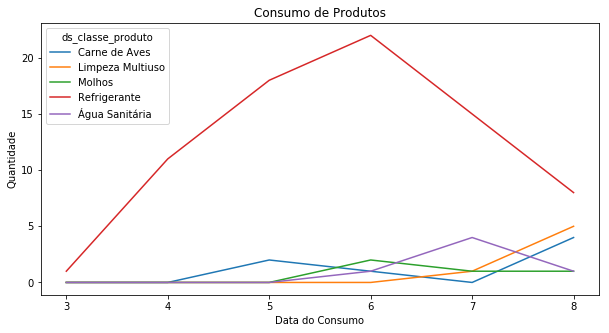

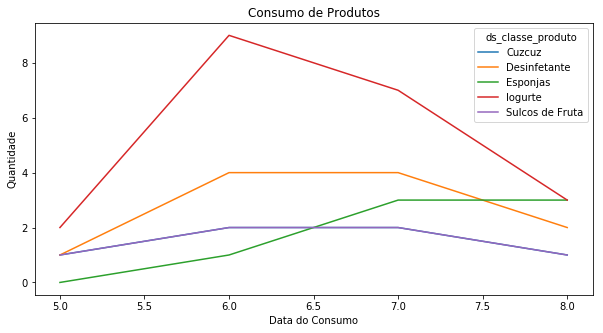

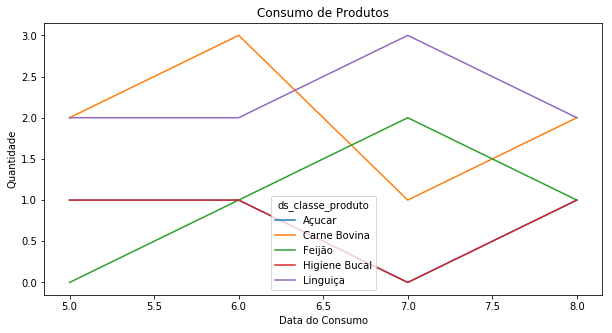

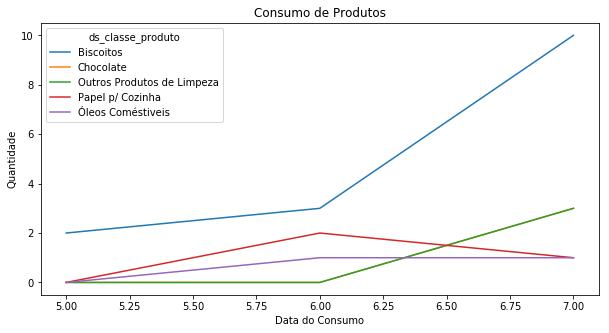

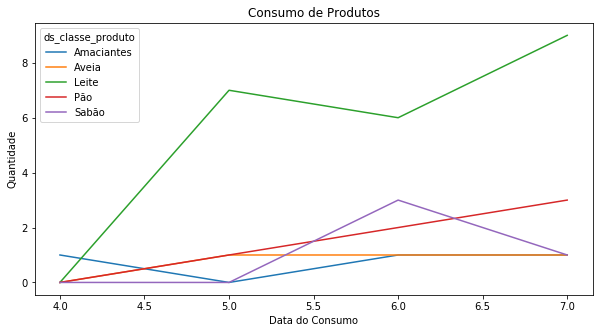

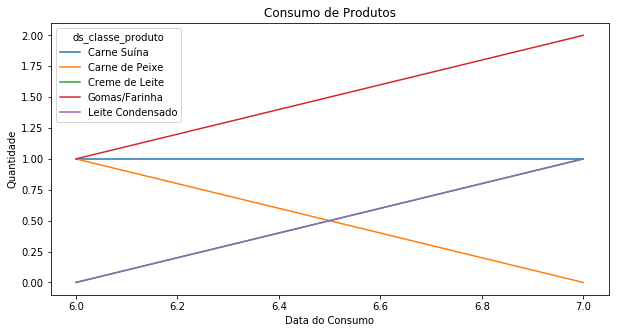

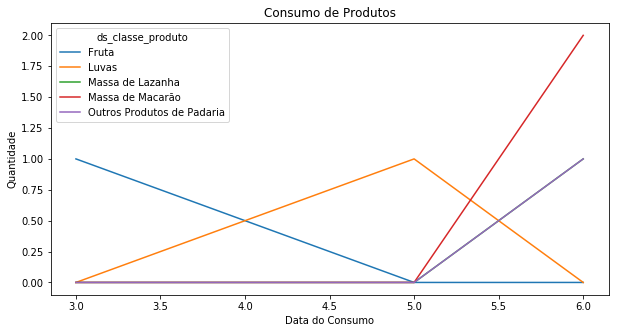

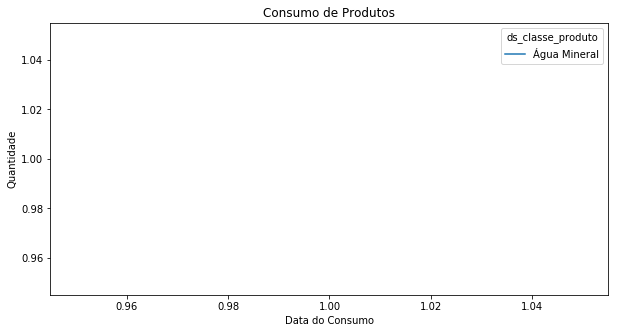

In [24]:
i = 0
lista_de_classes = df_saida.id_classe_produto.unique()
filtro_de_classes = []

for i,classe in enumerate(lista_de_classes,start=1):
    filtro_de_classes.append(classe)
    if not (i % QT_GRAFICOS) or i == len(lista_de_classes): #gera uma imagem de gŕaficos em blocos de QT_GRAFICOS
        df_filtrado = df_saida[df_saida.id_classe_produto.isin(filtro_de_classes)]
        df_evolucao = pd.crosstab(df_filtrado.dt_saida.dt.month,
                                  df_filtrado.ds_classe_produto,
                                  values=df_filtrado.qt_saida,
                                  aggfunc='sum').copy()
        df_evolucao.fillna(0,inplace=True)
        fig, ax = plt.subplots()   
        df_evolucao.plot(figsize=(10,5),ax=ax)
        ax.set(title=f'Consumo de Produtos', 
               xlabel='Data do Consumo', 
               ylabel='Quantidade')
        # Mostra o gráfico de comparação da evolução dos preços com a proposta vencedora

        plt.show()

        filtro_de_classes = []
    